# Unsupervised Machine Learning

### Table of Contents


### 1. Preparing Notebook

### 2. The Elbow technique

### 3. K-means clustering

## 1. Preparing Notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Matt\Documents\Data Analysis Course\Medal_Count_GDP_Project'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','Regression_Data.csv'))

In [5]:
# Checking df

df.shape

(164408, 17)

In [6]:
df.head()

,Unnamed: 0,Name,Sex,Age,Weight (kg),Height (cm),Country Name,Year,Season,Location,Sport,Event,Medal,After 1960,GDP,Total Country Medal Count,Average Country GDP
0,0,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Yes,366.460692,901,2656.268669
1,1,Bai Chongguang,M,21.0,184.0,83.0,China,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,Yes,366.460692,901,2656.268669
2,2,Bai Mei,F,17.0,166.0,46.0,China,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,Yes,366.460692,901,2656.268669
3,3,Bi Zhong,M,23.0,188.0,110.0,China,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,Yes,366.460692,901,2656.268669
4,4,Cai Yanshu,M,28.0,169.0,79.0,China,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,Yes,366.460692,901,2656.268669


In [7]:
df.columns

Index(['Unnamed: 0', 'Name', 'Sex', 'Age', 'Weight (kg)', 'Height (cm)',
       'Country Name', 'Year', 'Season', 'Location', 'Sport', 'Event', 'Medal',
       'After 1960', 'GDP', 'Total Country Medal Count',
       'Average Country GDP'],
      dtype='object')

In [8]:
# Creating Data Frame of only useful columns

df_new = df[['Age', 'Weight (kg)', 'Height (cm)', 'GDP', 'Total Country Medal Count', 'Average Country GDP',]]
df_new.head()

,Age,Weight (kg),Height (cm),GDP,Total Country Medal Count,Average Country GDP
0,24.0,180.0,80.0,366.460692,901,2656.268669
1,21.0,184.0,83.0,366.460692,901,2656.268669
2,17.0,166.0,46.0,366.460692,901,2656.268669
3,23.0,188.0,110.0,366.460692,901,2656.268669
4,28.0,169.0,79.0,366.460692,901,2656.268669


In [9]:
df_new.isnull().sum()

Age                            957
Weight (kg)                   8494
Height (cm)                   9040
GDP                          12363
Total Country Medal Count        0
Average Country GDP              0
dtype: int64

In [10]:
# Getting rid of all missing values so the elbow technique will work

df_new['Age'].fillna(df_new['Age'].mean(), inplace = True)
df_new['Weight (kg)'].fillna(df_new['Weight (kg)'].mean(), inplace = True)
df_new['Height (cm)'].fillna(df_new['Height (cm)'].mean(), inplace = True)
df_new['GDP'].fillna(df_new['GDP'].mean(), inplace = True)

C:\Users\Matt\Documents\Data Analysis Course\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [11]:
# Standardizing the data

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_new)

## 2. The Elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-74928280926154.11,
 -31929908317638.227,
 -20282528279997.43,
 -15036984209414.477,
 -11413576764712.572,
 -8852175828120.879,
 -7620146487350.354,
 -6500325048588.024,
 -5845823904783.917]

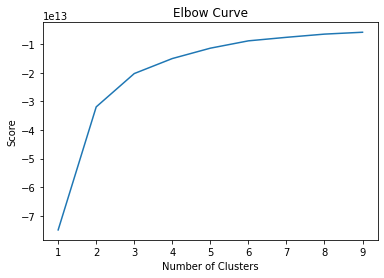

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Based on the elbow curve, it seems using 5 clusters should yield the best results because there seems to still be a decent amount of rise between 4 and 5, but after that it tails off.

## 3. K-means Clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5, n_jobs = -1) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df_new)

C:\Users\Matt\Documents\Data Analysis Course\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

In [18]:
# Creating new column detailing which cluster each data point falls under

df_new['clusters'] = kmeans.fit_predict(df_new)

C:\Users\Matt\Documents\Data Analysis Course\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Matt\AppData\Local\Temp/ipykernel_19116/605757784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clusters'] = kmeans.fit_predict(df_new)


In [19]:
df_new.head()

,Age,Weight (kg),Height (cm),GDP,Total Country Medal Count,Average Country GDP,clusters
0,24.0,180.0,80.0,366.460692,901,2656.268669,0
1,21.0,184.0,83.0,366.460692,901,2656.268669,0
2,17.0,166.0,46.0,366.460692,901,2656.268669,0
3,23.0,188.0,110.0,366.460692,901,2656.268669,0
4,28.0,169.0,79.0,366.460692,901,2656.268669,0


In [20]:
# Checking value count for 'clusters'

df_new['clusters'].value_counts()

0    67535
1    38217
3    30724
4    25471
2     2461
Name: clusters, dtype: int64

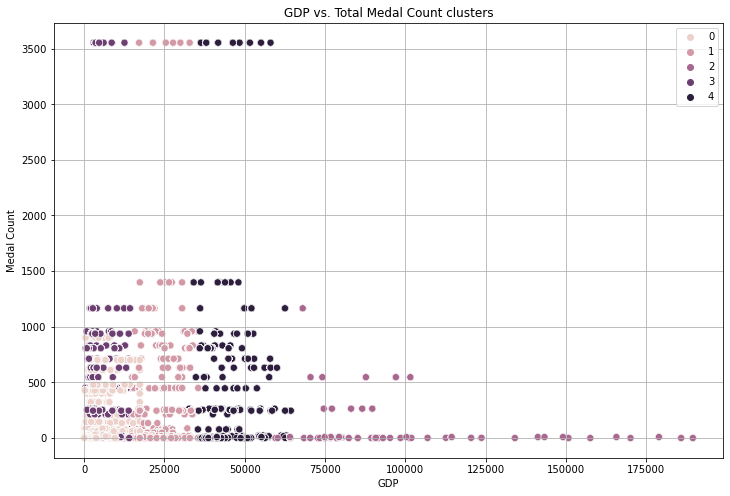

In [21]:
# Plot the clusters for the "GDP" and "Total Country Medal Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['GDP'], y=df['Total Country Medal Count'], hue=kmeans.labels_, s=50) 

ax.grid(True)
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Medal Count')#Label y-axis.
plt.title('GDP vs. Total Medal Count clusters')
plt.show()

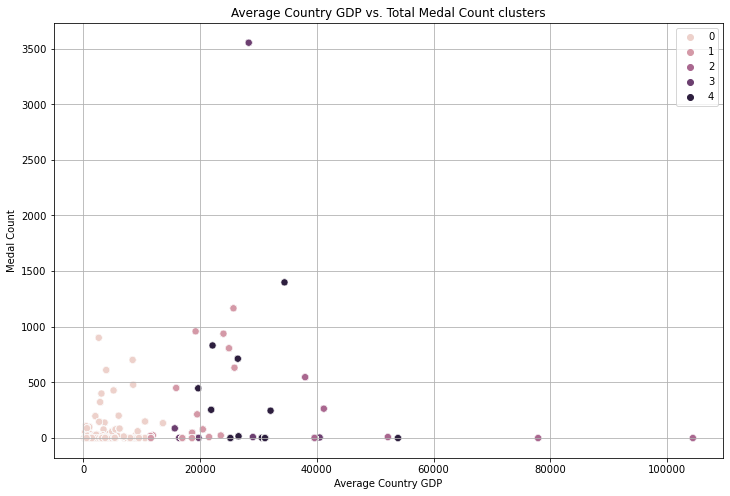

In [22]:
# Plot the clusters for the "Average GDP" and "Total Country Medal Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Average Country GDP'], y=df['Total Country Medal Count'], hue=kmeans.labels_, s=50) 

ax.grid(True)
plt.xlabel('Average Country GDP') # Label x-axis.
plt.ylabel('Medal Count')#Label y-axis.
plt.title('Average Country GDP vs. Total Medal Count clusters')
plt.show()

In [23]:
# Exporting chart
ax.figure.savefig(os.path.join(path, '04 Analysis', 'cluster.png'))

In [ ]:
# Plot the clusters for the "Height" and "Total Country Medal Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['Height (cm)'], y=df['Total Country Medal Count'], hue=kmeans.labels_, s=50) 

ax.grid(True)
plt.xlabel('Height') # Label x-axis.
plt.ylabel('Medal Count')#Label y-axis.
plt.title('Height vs. Total Medal Count clusters')
plt.show()

#### Based on the data we're working with, there doesn't seem to be a common thread for countries with high medal counts. Height, GDP, and Average GDP over a 50-year span doesn't have a correlation with how many medals a country will win at the olympics. 

In [ ]:
# Renaming clusters to coincide with the visualizations

df_new.loc[df_new['clusters'] == 2, 'cluster'] = 'Dark pink'
df_new.loc[df_new['clusters'] == 1, 'cluster'] = 'pink'
df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'Light pink'
df_new.loc[df_new['clusters'] == 3, 'cluster'] = 'Purple'
df_new.loc[df_new['clusters'] == 4, 'cluster'] = 'Dark Purple'

In [ ]:
# Finding descriptive statistics

df_new.groupby('clusters').agg({'Height (cm)' : ['mean', 'median'],
                              'Weight (kg)' : ['mean', 'median'],
                              'GDP' : ['mean', 'median'],
                                'Total Country Medal Count' : ['mean', 'median'],
                                'Average Country GDP' : ['mean', 'median'],
                                'Age' : ['mean', 'median']})

#### Cluster 2 makes sense to me, as it's the cluster with the lowest Average country GDP and the lowest medal count. But then you look at Cluster 3, which has the highest average GDP, and it has the 2nd lowest medal count in terms of mean. 

#### Moving forward, I would like to include population in the analysis. If you look back at the Average country GDP vs Total medal count visualization, you can see an outlier at the top of the graph. That point is the US. It has by far the most medals, but is far from the country with the highest average GDP. I would like to see how population plays a part in that relationship as well. 

In [ ]:
df_new_1.head()

In [ ]:
df_new_1.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Cluster_Data.csv'))